In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(f"Churn_Modelling.csv", index_col= 'CustomerId')

In [4]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = df.drop(['RowNumber', 'Surname'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


# EDA and Data Visualization

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


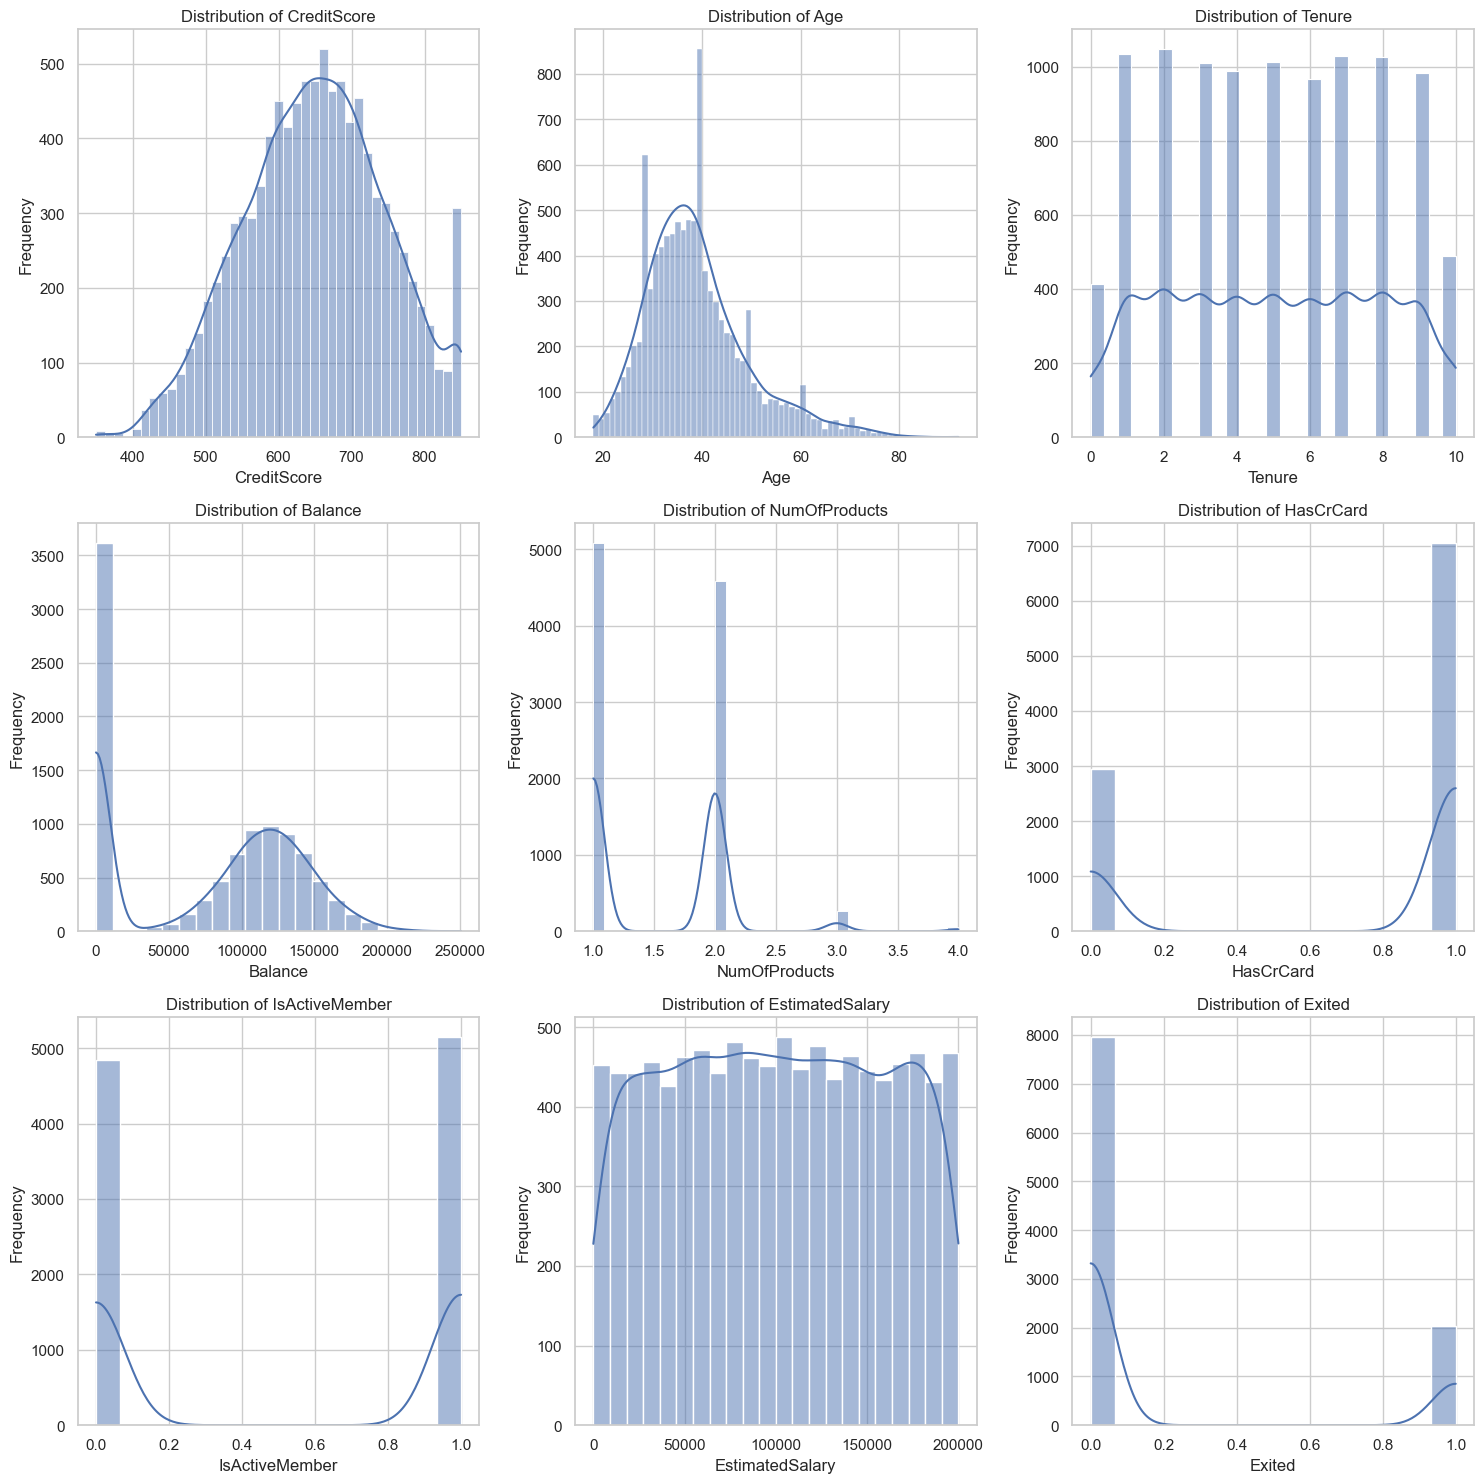

In [20]:
numeric_columns = df.select_dtypes(include='number').columns

num_plots = len(numeric_columns)

# grid size
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols

# subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()
sns.set(style="whitegrid")
# Plot each column in a separate subplot
for ax, column in zip(axes, numeric_columns):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for ax in axes[num_plots:]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

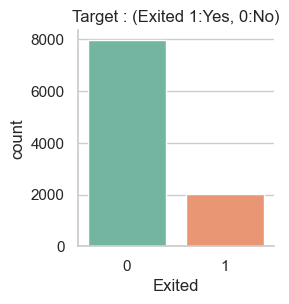

<Figure size 700x500 with 0 Axes>

In [33]:
sns.catplot(data=df, x="Exited", kind="count", height=3, palette ='Set2')
sns.color_palette("hls", 8)
plt.title('Target : (Exited 1:Yes, 0:No)')
plt.figure(figsize=(7,5))

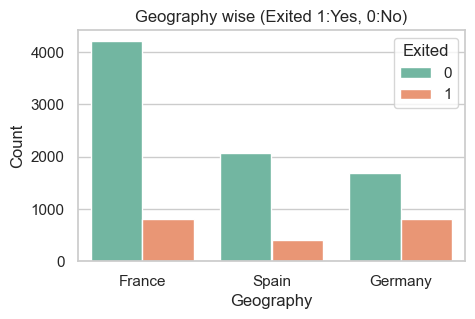

In [34]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Geography', data=df, hue='Exited', palette ='Set2')
plt.title('Geography wise (Exited 1:Yes, 0:No)')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

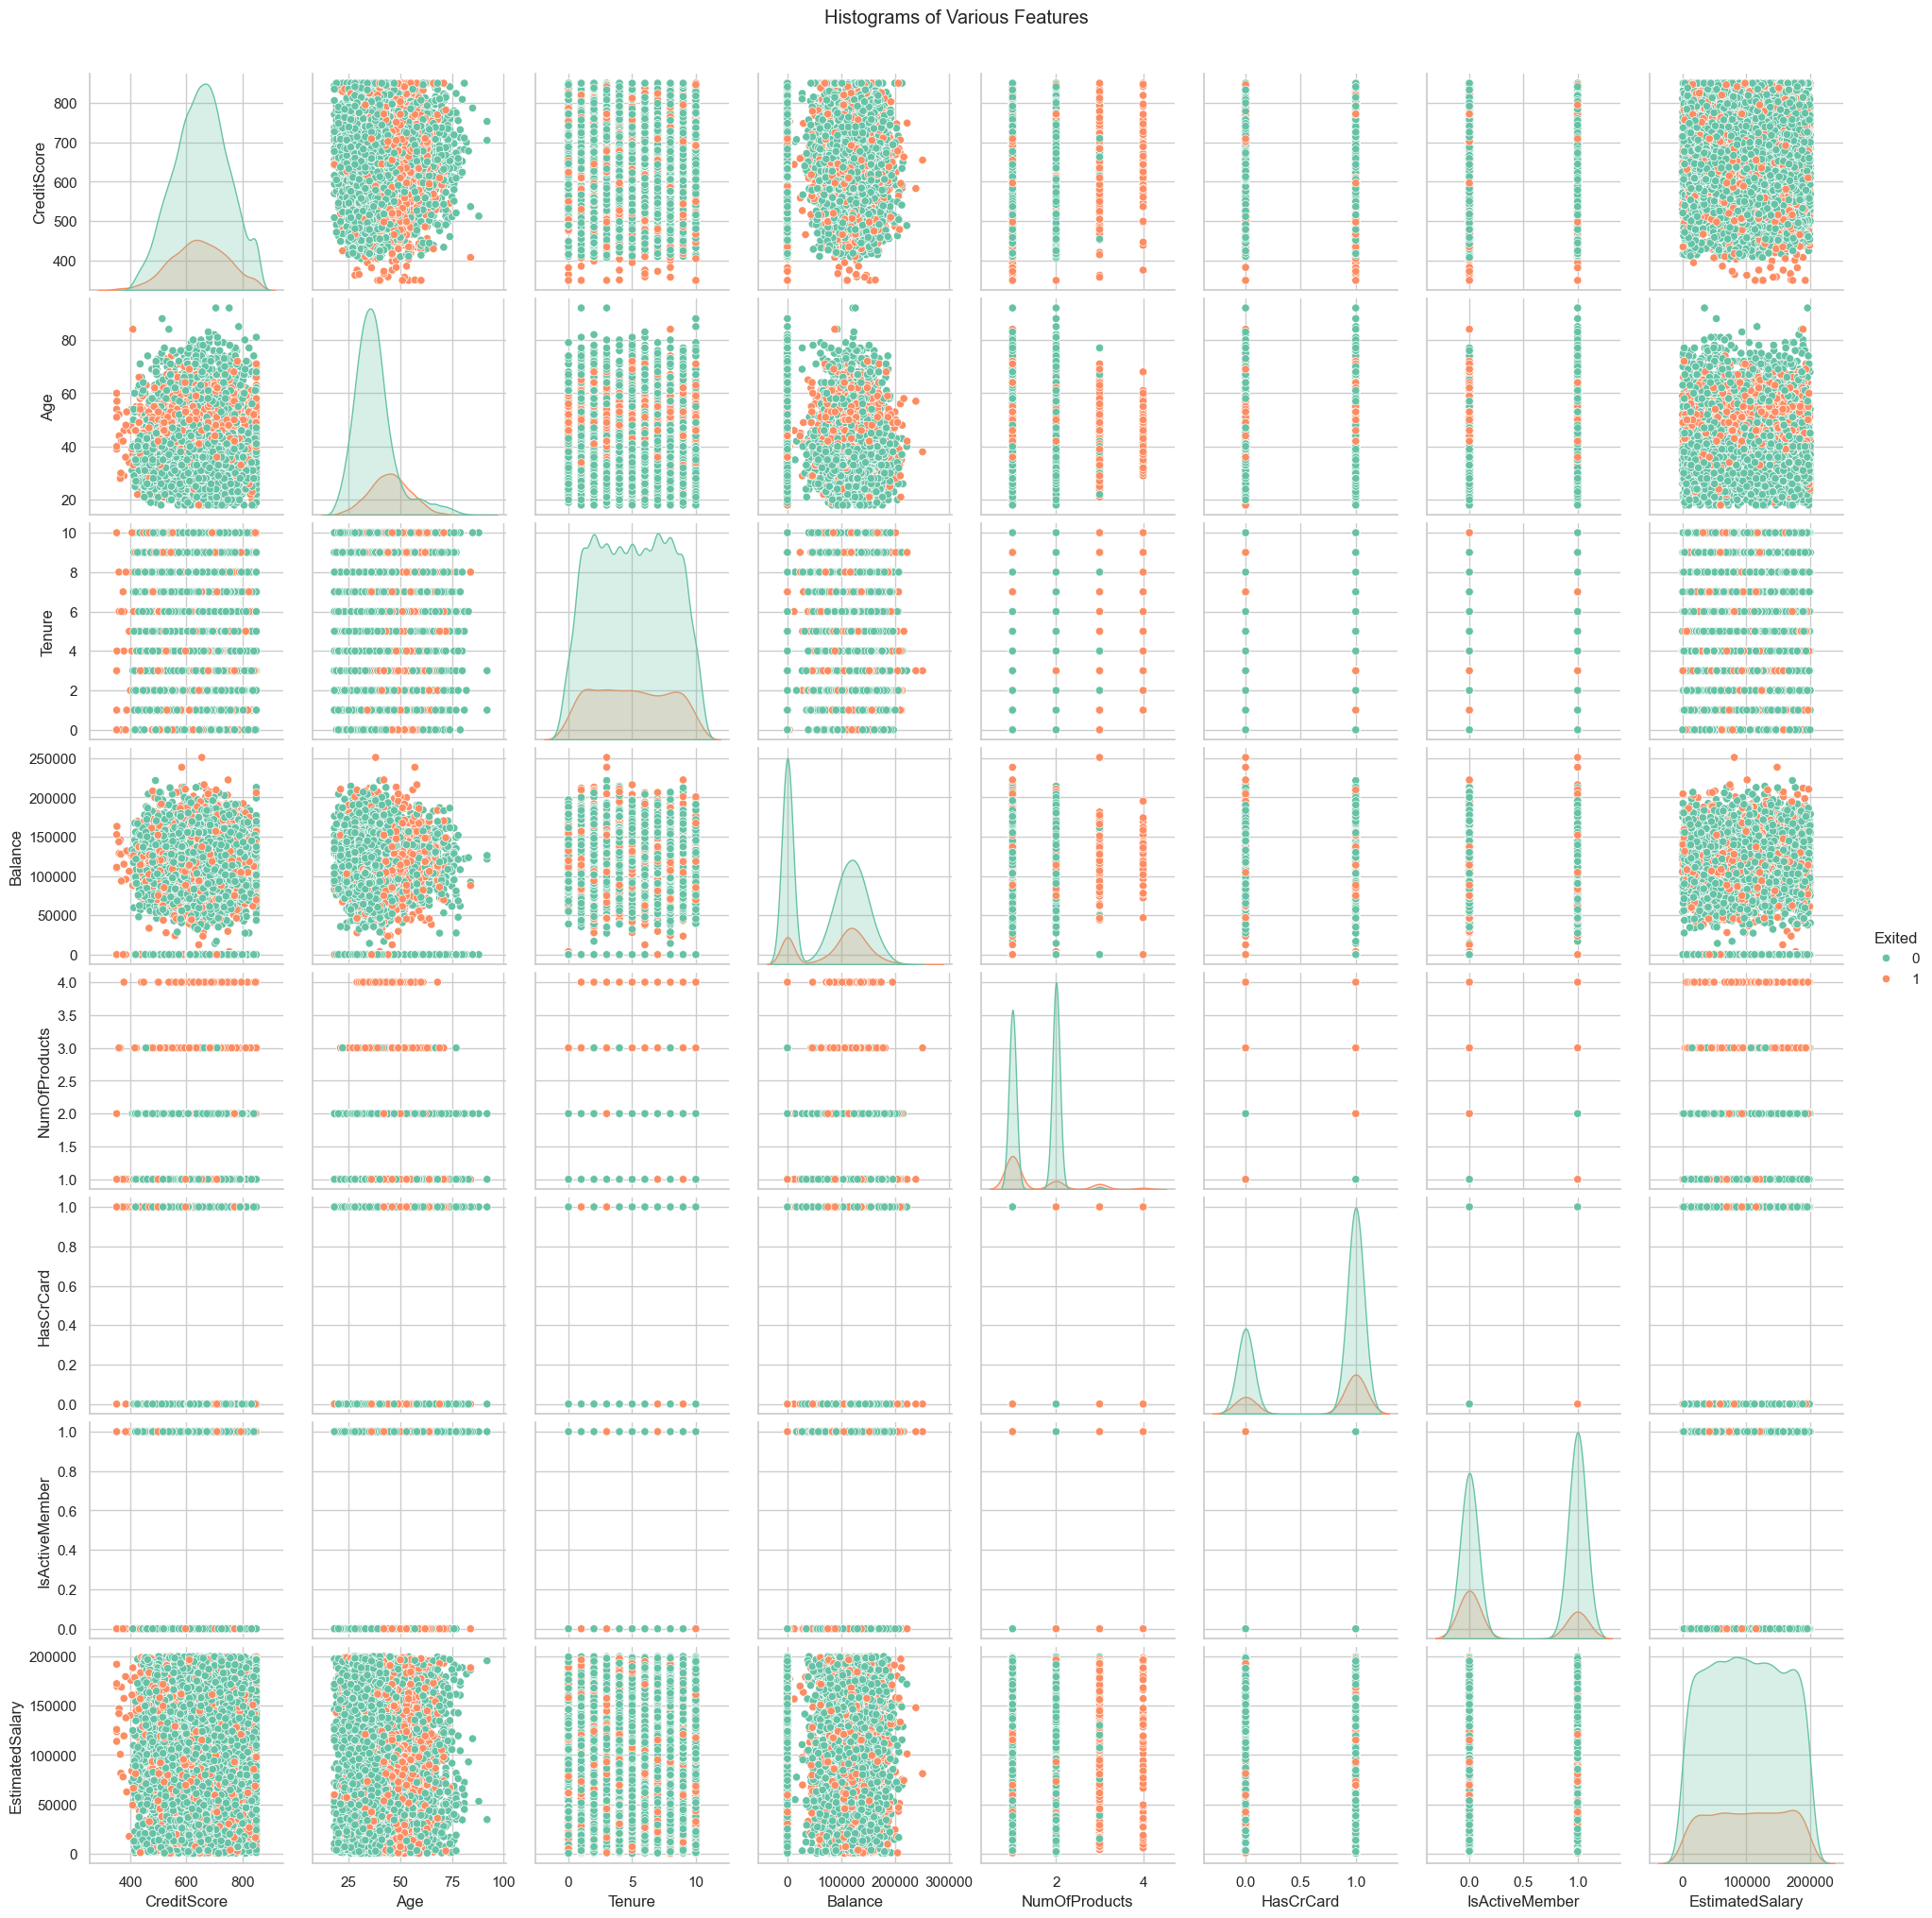

In [35]:
sns.pairplot(df, hue='Exited', palette ='Set2')
plt.suptitle('Histograms of Various Features', y=1.02)
plt.show()

Text(0.5, 1.0, 'Relationship B/W Country X Estimated Salary & Exited (Exited 1:Yes, 0:No)')

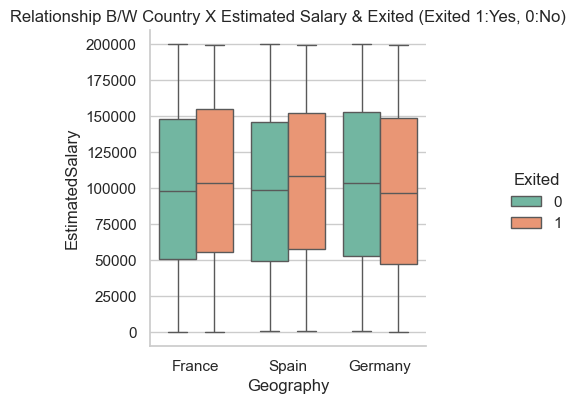

In [42]:
sns.catplot(data=df,x='Geography', y='EstimatedSalary', hue='Exited', kind='box', height=4, palette ='Set2')
plt.title('Relationship B/W Country X Estimated Salary & Exited (Exited 1:Yes, 0:No)')

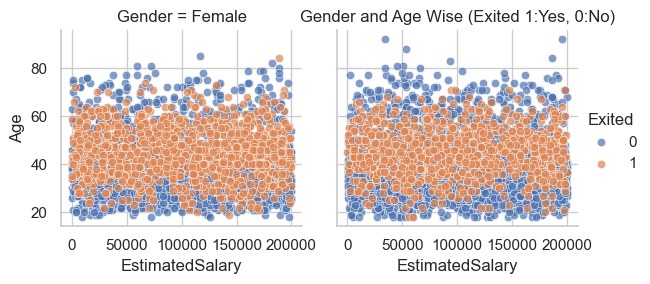

In [47]:
g = sns.FacetGrid(df, col="Gender", hue="Exited")
g.map(sns.scatterplot, "EstimatedSalary", "Age", alpha=.7)
plt.title('Gender and Age Wise (Exited 1:Yes, 0:No)')
g.add_legend()

Text(0.5, 1.0, 'Relation B/W Estimated Salary & Exited (Exited 1:Yes, 0:No)')

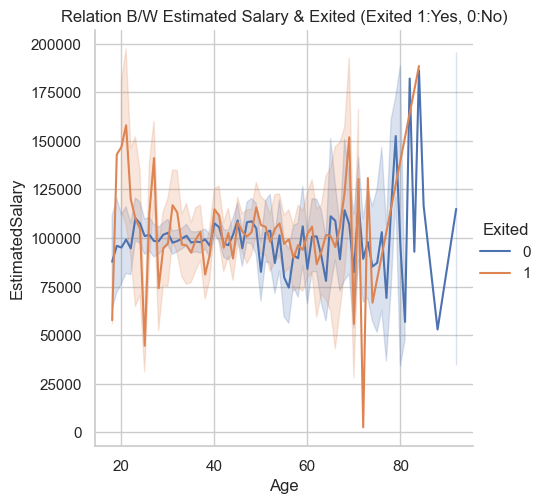

In [48]:
sns.relplot(data=df, x="Age", y="EstimatedSalary", hue="Exited", kind="line")
plt.title('Relation B/W Estimated Salary & Exited (Exited 1:Yes, 0:No)')

Text(0.5, 1.0, 'Relation B/W Credit Score & Exited (Exited 1:Yes, 0:No)')

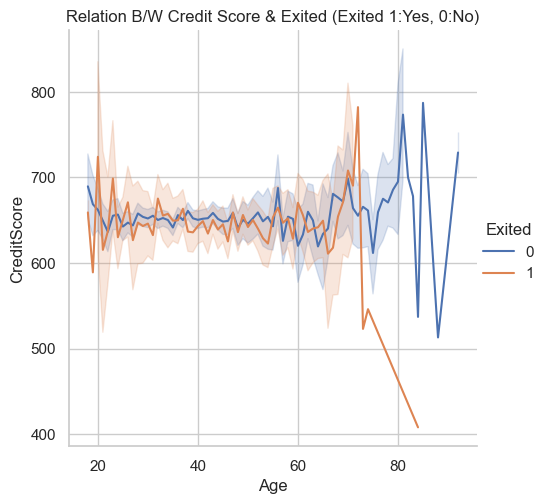

In [49]:
sns.relplot(data=df, x="Age", y="CreditScore", hue="Exited", kind="line")
plt.title('Relation B/W Credit Score & Exited (Exited 1:Yes, 0:No)')

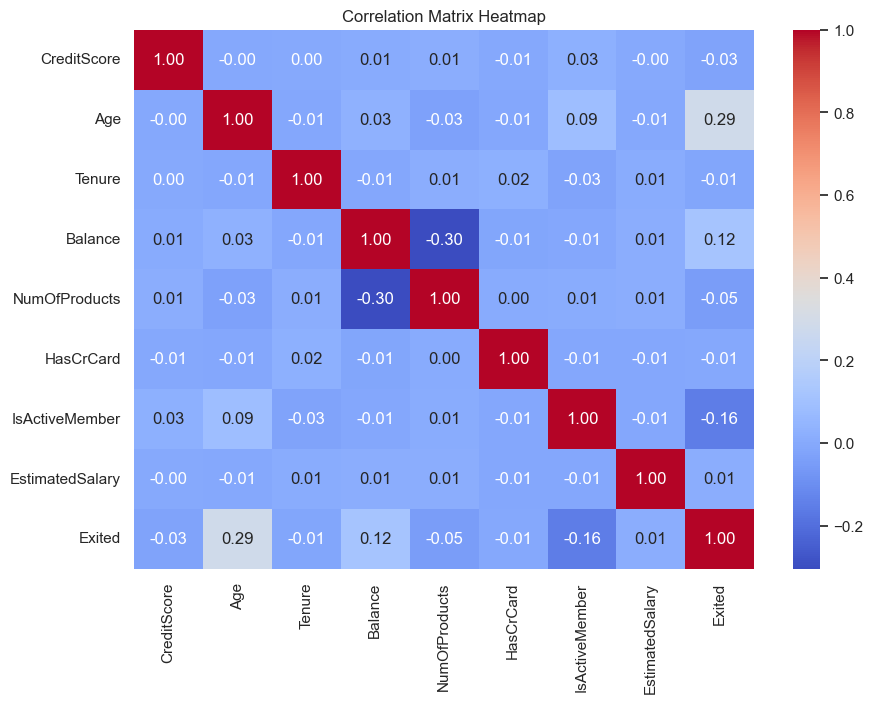

In [50]:
plt.figure(figsize=(10, 7))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Preprocessing

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# lists of features for each transformation type
num_list = ['Age', 'Tenure', 'NumOfProducts']
log_list = ['CreditScore', 'Balance', 'EstimatedSalary']
cat_list = ['Geography', 'Gender']

# pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])


def safe_log_transform(x):
    return np.log(x + 1e-9)  # Adding a small constant to avoid log(0)

# pipeline for logarithmic transformation features
log_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('log_transformer', FunctionTransformer(safe_log_transform, validate=True,
                                           feature_names_out="one-to-one")),
    ('scaler', StandardScaler())
])

# pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Combine all the pipelines into a ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_list),
    ('log', log_pipeline, log_list),
    ('cat', cat_pipeline, cat_list)
],
remainder = 'passthrough')

In [52]:
preprocessed_data = preprocessing.fit_transform(df)
col = preprocessing.get_feature_names_out()
pd.DataFrame(data=preprocessed_data, columns=col)

,num__Age,num__Tenure,num__NumOfProducts,log__CreditScore,log__Balance,log__EstimatedSalary,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male,remainder__HasCrCard,remainder__IsActiveMember,remainder__Exited
0,0.293517,-1.041760,-0.911583,-0.249545,-1.328290,0.317871,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.198164,-1.387538,-0.911583,-0.366608,0.732013,0.422594,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.293517,1.032908,2.527057,-1.617360,0.773434,0.434856,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.007457,-1.387538,0.807737,0.544001,-1.328290,0.240779,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.388871,-1.041760,-0.911583,1.820939,0.757968,0.069906,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.007457,-0.004426,0.807737,1.184068,-1.328290,0.266484,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9996,-0.373958,1.724464,-0.911583,-1.437775,0.707656,0.321325,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9997,-0.278604,0.687130,-0.911583,0.636741,-1.328290,-0.560667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
9998,0.293517,-0.695982,0.807737,1.192531,0.724942,0.230734,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


# Preparing training and test sets

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
features = df.drop('Exited', axis=1).copy()
labels = df['Exited'].copy()

train_X, test_X, train_y, test_y = train_test_split(features, labels, stratify=df['Exited'] ,
                                                    train_size=0.80, shuffle=True, random_state=42)

# Model Trainer

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from scipy.stats import randint

In [54]:
class ModelTrainer:
    def __init__(self, model, preprocessing=None, param_grid=None, n_iter=10, cv=3, scoring='f1', random_state=42):
        self.model = model
        self.preprocessing = preprocessing
        self.param_grid = param_grid
        self.n_iter = n_iter
        self.cv = cv
        self.scoring = scoring
        self.random_state = random_state
        self.clf = make_pipeline(preprocessing, model) if preprocessing else model
    
    def train(self, train_X, train_y):
        print(f"Training model {self.model}")
        self.clf.fit(train_X, train_y)
        cv_score = cross_val_score(self.clf, train_X, train_y, cv=self.cv, scoring=self.scoring).mean()
        print(f"Cross-validation score: {cv_score}")
    
    def hypertune(self, train_X, train_y):
        if self.param_grid:
            print("Starting hyperparameter tuning...")
            rnd_search = RandomizedSearchCV(
                self.clf, param_distributions=self.param_grid, n_iter=self.n_iter,
                cv=self.cv, scoring=self.scoring, random_state=self.random_state
            )
            rnd_search.fit(train_X, train_y)
            self.best_estimator_ = rnd_search.best_estimator_
            print(f"Best parameters: {rnd_search.best_params_}")
        else:
            print("No hyperparameter grid provided.")
    
    def evaluate(self, test_X, test_y):
        if hasattr(self, 'best_estimator_'):
            clf_to_use = self.best_estimator_
        else:
            clf_to_use = self.clf
        pred_y = clf_to_use.predict(test_X)
        print("Test set accuracy: ", accuracy_score(test_y, pred_y))
        print(classification_report(test_y, pred_y))
        
    def plot_roc_curve(self, test_X, test_y):
        clf_to_use = self.best_estimator_ if hasattr(self, 'best_estimator_') else self.clf
        if hasattr(clf_to_use, "decision_function"):
            y_scores = clf_to_use.decision_function(test_X)
        else:
            y_scores = clf_to_use.predict_proba(test_X)[:, 1]

        fpr, tpr, _ = roc_curve(test_y, y_scores)
        roc_auc = roc_auc_score(test_y, y_scores)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic: {self.model.__class__.__name__}')
        plt.legend(loc="lower right")
        plt.show()

# Logistic Regression

Training model LogisticRegression(random_state=42)
Cross-validation score: 0.3176019884642462
Starting hyperparameter tuning...
Best parameters: {'logisticregression__C': 15, 'logisticregression__max_iter': 200, 'logisticregression__tol': 1e-05}
Test set accuracy:  0.807
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.58      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.58      2000
weighted avg       0.77      0.81      0.76      2000



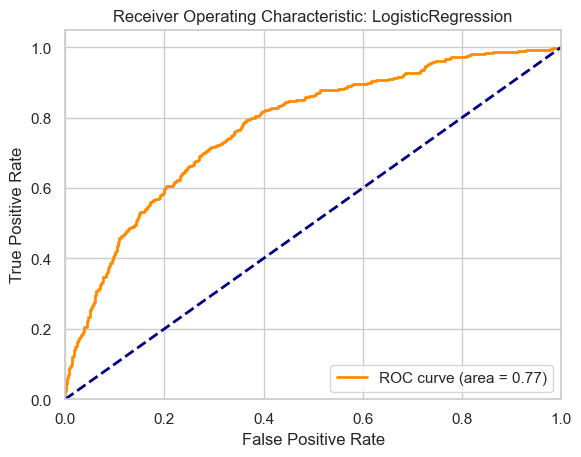

In [57]:
from sklearn.linear_model import LogisticRegression


param_grid = {
    'logisticregression__tol': [1e-2, 1e-3, 1e-4, 1e-5],
    'logisticregression__C': randint(1, 20),
    'logisticregression__max_iter': [100, 150, 200, 250]
}


trainer_1 = ModelTrainer(LogisticRegression(random_state=42), preprocessing, param_grid)
trainer_1.train(train_X, train_y)
trainer_1.hypertune(train_X, train_y)
trainer_1.evaluate(test_X, test_y)
trainer_1.plot_roc_curve(test_X, test_y)

# Random Forest Classifier

Training model RandomForestClassifier()
Cross-validation score: 0.5686819336996424
Starting hyperparameter tuning...
Best parameters: {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 6, 'randomforestclassifier__n_estimators': 406}
Test set accuracy:  0.8545
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.72      0.46      0.57       407

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



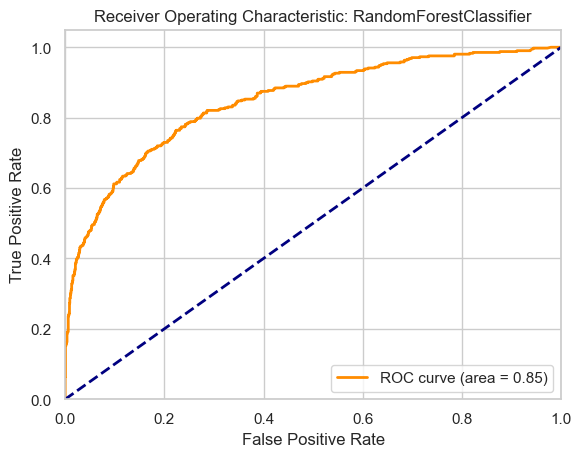

In [58]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'randomforestclassifier__n_estimators': randint(100, 500),  # Adjusted range
    'randomforestclassifier__max_features': [None, 'sqrt', 'log2', 0.5],
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'randomforestclassifier__min_samples_split': randint(2, 20),
    'randomforestclassifier__min_samples_leaf': randint(1, 20),
    'randomforestclassifier__bootstrap': [True, False]
}

trainer_2 = ModelTrainer(RandomForestClassifier(), preprocessing, param_grid)
trainer_2.train(train_X, train_y)
trainer_2.hypertune(train_X, train_y)
trainer_2.evaluate(test_X, test_y)
trainer_2.plot_roc_curve(test_X, test_y)

# GradientBoostingClassifier

Training model GradientBoostingClassifier()
Cross-validation score: 0.5794970824418059
Starting hyperparameter tuning...
Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_features': 10, 'gradientboostingclassifier__n_estimators': 180, 'gradientboostingclassifier__tol': 0.0001}
Test set accuracy:  0.8685
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



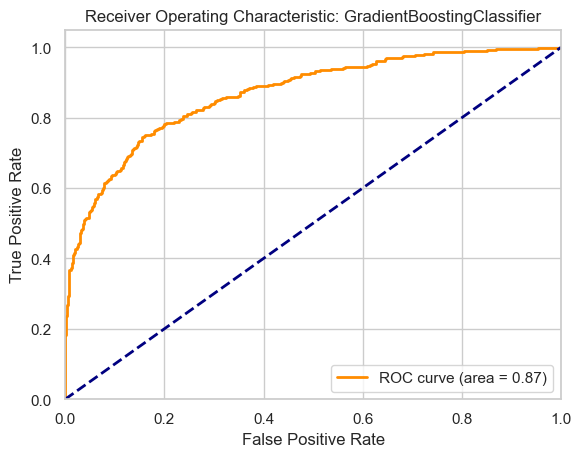

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'gradientboostingclassifier__learning_rate' : [0.01, 0.001, 0.0001, 0.1],
    'gradientboostingclassifier__n_estimators': randint(50, 500), 
    'gradientboostingclassifier__tol' : [0.001, 0.0001, 0.01, 0.1],
    'gradientboostingclassifier__max_features': randint(3, 13)
}

trainer_3 = ModelTrainer(GradientBoostingClassifier(), preprocessing, param_grid)
trainer_3.train(train_X, train_y)
trainer_3.hypertune(train_X, train_y)
trainer_3.evaluate(test_X, test_y)
trainer_3.plot_roc_curve(test_X, test_y)

# AdaBoostClassifier

Training model AdaBoostClassifier()
Cross-validation score: 0.5715562883293784
Starting hyperparameter tuning...
Best parameters: {'adaboostclassifier__learning_rate': 1.0, 'adaboostclassifier__n_estimators': 199}
Test set accuracy:  0.854
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.47      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



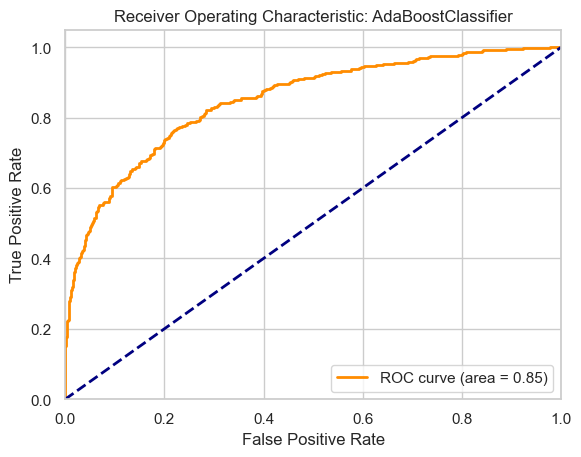

In [61]:
from sklearn.ensemble import AdaBoostClassifier

param_grid_ada = {
    'adaboostclassifier__n_estimators': randint(50, 500),
    'adaboostclassifier__learning_rate': [0.01, 0.1, 1.0, 1.5, 2.0]
}

trainer_ada = ModelTrainer(AdaBoostClassifier(), preprocessing, param_grid_ada)
trainer_ada.train(train_X, train_y)
trainer_ada.hypertune(train_X, train_y)
trainer_ada.evaluate(test_X, test_y)
trainer_ada.plot_roc_curve(test_X, test_y)


# Support Vector Classifier

Training model SVC()
Cross-validation score: 0.5141081551851876
Starting hyperparameter tuning...
Best parameters: {'svc__C': 8.424426408004217, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Test set accuracy:  0.8585
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



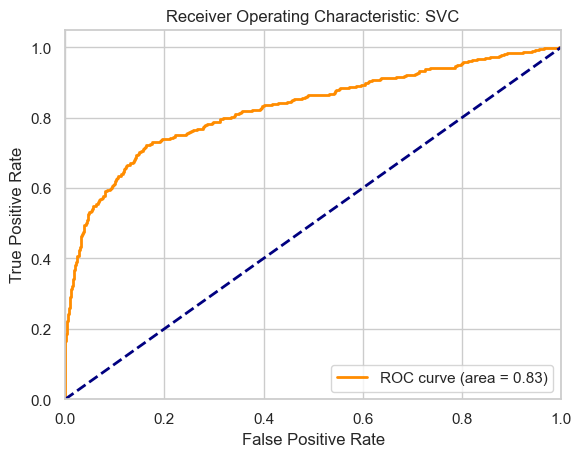

In [60]:
from sklearn.svm import SVC
from scipy.stats import uniform

param_grid_svc = {
    'svc__C': uniform(0.1, 10),
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

trainer_svc = ModelTrainer(SVC(), preprocessing, param_grid_svc)
trainer_svc.train(train_X, train_y)
trainer_svc.hypertune(train_X, train_y)
trainer_svc.evaluate(test_X, test_y)
trainer_svc.plot_roc_curve(test_X, test_y)


# K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

param_grid_knn = {
    'kneighborsclassifier__n_neighbors': randint(1, 30),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

trainer_knn = ModelTrainer(KNeighborsClassifier(), preprocessing, param_grid_knn)
trainer_knn.train(train_X, train_y)
trainer_knn.hypertune(train_X, train_y)
trainer_knn.evaluate(test_X, test_y)
trainer_knn.plot_roc_curve(test_X, test_y)


# ExtraTreesClassifier

Training model ExtraTreesClassifier()
Cross-validation score: 0.5474969878914084
Starting hyperparameter tuning...
Best parameters: {'extratreesclassifier__max_depth': 30, 'extratreesclassifier__max_features': None, 'extratreesclassifier__min_samples_leaf': 2, 'extratreesclassifier__min_samples_split': 2, 'extratreesclassifier__n_estimators': 869}
Test set accuracy:  0.852
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



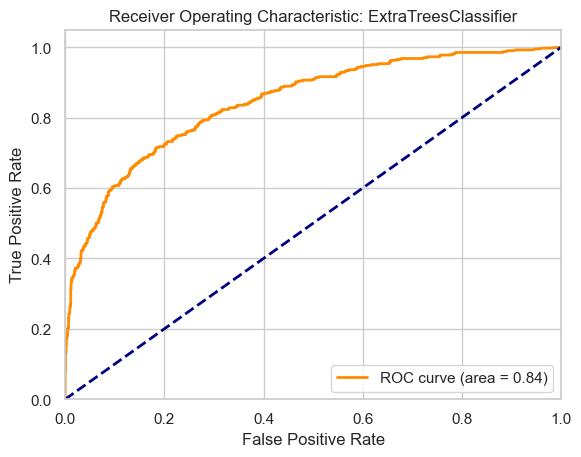

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import randint

param_grid_et = {
    'extratreesclassifier__n_estimators': randint(100, 1000),
    'extratreesclassifier__max_features': ['sqrt', 'log2', None],
    'extratreesclassifier__max_depth': [None, 10, 20, 30],
    'extratreesclassifier__min_samples_split': [2, 5, 10],
    'extratreesclassifier__min_samples_leaf': [1, 2, 4]
}

trainer_et = ModelTrainer(ExtraTreesClassifier(), preprocessing, param_grid_et)
trainer_et.train(train_X, train_y)
trainer_et.hypertune(train_X, train_y)
trainer_et.evaluate(test_X, test_y)
trainer_et.plot_roc_curve(test_X, test_y)


Training model MLPClassifier()


c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Cross-validation score: 0.5782804605890467
Starting hyperparameter tuning...


c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Best parameters: {'mlpclassifier__activation': 'logistic', 'mlpclassifier__alpha': 0.00017066305219717406, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__solver': 'adam'}
Test set accuracy:  0.8665
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1593
           1       0.75      0.51      0.61       407

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


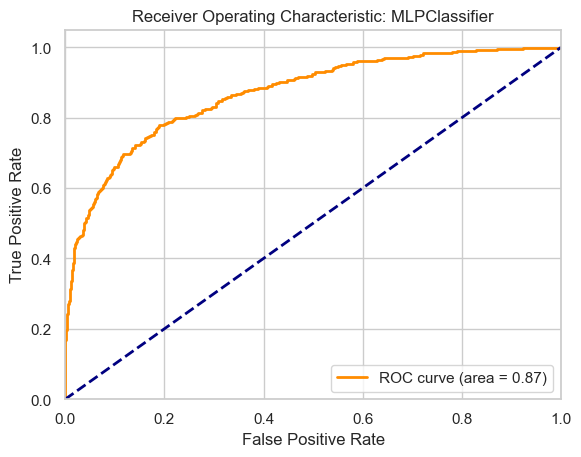

In [64]:
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform

param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'],
    'mlpclassifier__alpha': uniform(0.0001, 0.01),
    'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlpclassifier__max_iter': [500, 1000, 2000],  # Increased number of iterations
    'mlpclassifier__early_stopping': [True, False]
}

trainer_mlp = ModelTrainer(MLPClassifier(), preprocessing, param_grid_mlp)
trainer_mlp.train(train_X, train_y)
trainer_mlp.hypertune(train_X, train_y)
trainer_mlp.evaluate(test_X, test_y)
trainer_mlp.plot_roc_curve(test_X, test_y)
